In [15]:
import os
from PIL import Image
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
# Import images:
imgs = list()
for file in os.listdir("img"):
    if file.endswith(".jpeg"):
        with Image.open("img/" + file) as myImage:
            imgs.append(np.array(myImage))

# Get redundant images:
load_background = False
for file in os.listdir("img"):
    if file == "background.npy":
        load_background = True
if load_background:
    background = np.load("img/background.npy")
else:
    arimgs = np.concatenate(([img.reshape([*img.shape, 1]) for img in imgs]), axis=3)
    background = stats.mode(arimgs, axis=3)[0].reshape([*imgs[0].shape])
    # Hard code to get rid of score number:
    
    np.save("img/background", background)

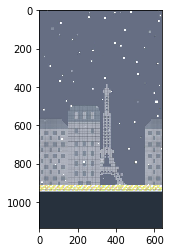

In [19]:
background[140:235, 290:355, :] = background[140, 290, :]
plt.imshow(background)

In [36]:
# Now the delivery guy using img1 and img3:
with Image.open("img/img1.jpeg") as myImage:
    img1 = np.array(myImage)
with Image.open("img/img3.jpeg") as myImage:
    img2 = np.array(myImage)
    
# Create mask to find non common pixels:
mask = np.all(img1 != img3, axis=2)
mask = mask.reshape([*mask.shape, 1])

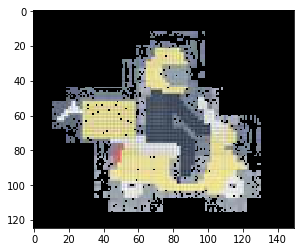

In [37]:
# Delivery boi 1:
delivery1 = img1 * np.concatenate((mask, mask, mask), axis=2)
plt.imshow(delivery1[500:625, 125:275, :])

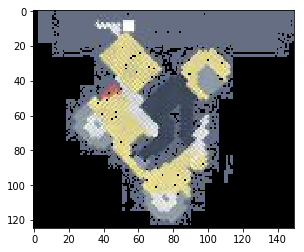

In [40]:
# Delivery boi 2:
delivery2 = img2 * np.concatenate((mask, mask, mask), axis=2)
plt.imshow(delivery2[365:490, 125:275, :])

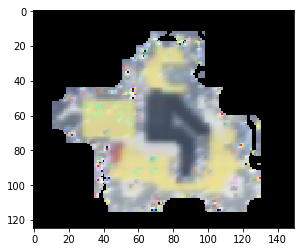

In [49]:
# Trying to fill delivery boi 1:
delivery = delivery1[500:625, 125:275, :]
mask = np.sum(delivery, axis=2) > 0
for i in range(1, mask.shape[0]-1):
    for j in range(1, mask.shape[1]-1):
        filling = np.sum(mask[i-1:i+2, j-1:j+2])
        if filling > 3 and not mask[i, j]:
            delivery[i, j, :] = np.sum(delivery[i-1:i+2, j-1:j+2, :], axis=(0, 1)) / filling
            
plt.imshow(delivery)